In [0]:
import pandas as pd

import numpy as np

from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)

from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/abhinavkmr569/Heart_Disease_ML/master/cleveland.csv', header = None)

In [30]:
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [31]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

### 1 = male, 0 = female
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [0]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,male,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,male,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,male,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,female,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 33.3+ KB


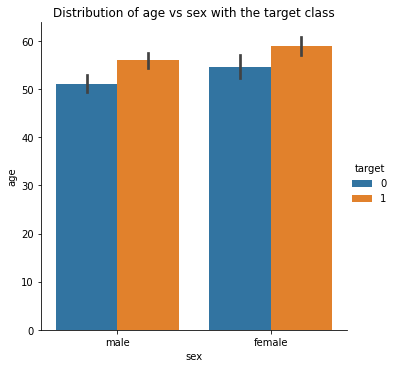

In [35]:
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

df['sex'] = df.sex.map({'female': 0, 'male': 1})

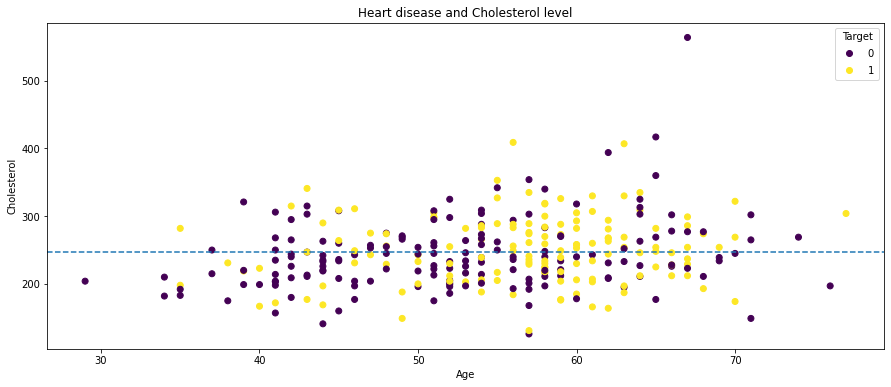

In [36]:
fig,ax = plt.subplots(figsize=(15,6));

i = ax.scatter(x = df["age"],
          y = df["chol"],
           c = df["target"]
          );
ax.set(xlabel = "Age",
      ylabel = "Cholesterol",
      title = "Heart disease and Cholesterol level");

ax.legend(*i.legend_elements(),title = "Target");
ax.axhline(df["chol"].mean(),
          linestyle ="--");

### Data Preprocessing

In [0]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.18,random_state = 42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Using SVM Classifier

In [38]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))




0.9090909090909091


In [0]:
def input_scaler(age,sex,cp,trestbps,chol,fb,restecg,thalach,exang,oldpeak,slope,ca,thal):
  if sex == 'female': sex = 0
  else : sex = 1
  X_train, _, _, _ = train_test_split(X, y, test_size = 0.18,random_state = 42)
  input_np = [age,sex,cp,trestbps,chol,fb,restecg,thalach,exang,oldpeak,slope,ca,thal]
  X_train = np.vstack([X_train,input_np])
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  return X_train[-1:]

In [0]:
input_scaled = input_scaler(age,sex,cp,trestbps,chol,fb,restecg,thalach,exang,oldpeak,slope,ca,thal)

NameError: ignored

In [0]:
pred = classifier.predict(input_scaled)[0]

In [0]:
pred

1

###Saving this as a pickle file

In [0]:
import pickle
with open('heart_model.pkl', 'wb') as file:
    pickle.dump(classifier, file)